In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils_titanic import get_pclass_dist, display_pclass_dist, get_survived_dist, display_surv_dist

# Exercice 1 bonus : missing values

Dans ce notebook nous allons nous intéresser à la variable cabin qui possède un grand nombre de valeurs manquantes.
    
On propose ici de croiser la variable avec Pclass.

In [2]:
path = '../titanic/'
train = pd.read_csv(path+'train.csv')

round(train.isnull().sum()['Cabin']/train.shape[0] *100,2)

77.1

J'ai choisi ici d'extraire uniquement le pont (ou deck) de la variable cabin. Cela correspond à la labélissation des 6 chambres du bateau (cf. plan du titanic).
    
Je choisis de remplacer par M les ponts inconnus (missing values).

In [3]:
train['Deck'] = train['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
train[['Cabin', 'Deck']].head()

,Cabin,Deck
0,NaN,M
1,C85,C
2,NaN,M
3,C123,C
4,NaN,M


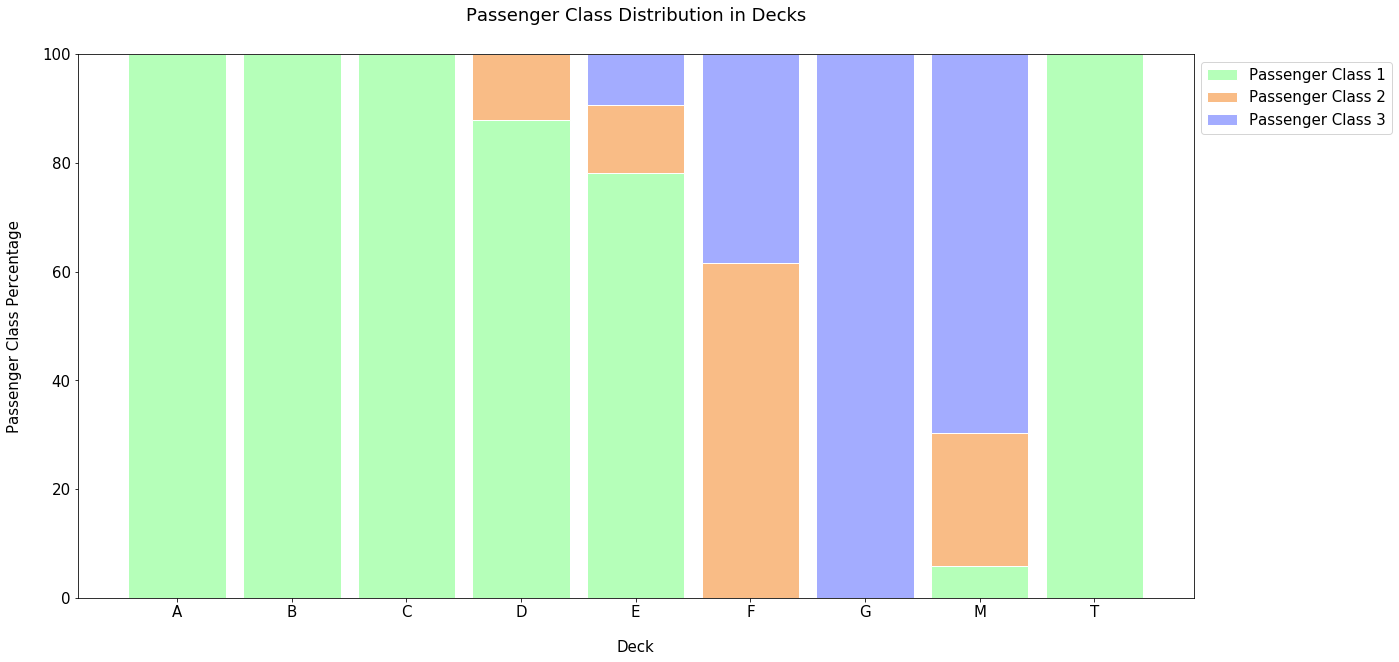

In [4]:
train_deck_pclass_crossed = train.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()  

all_deck_count, all_deck_per = get_pclass_dist(train_deck_pclass_crossed)
display_pclass_dist(all_deck_per)

On constate que  :
- 100% des ponts A,B et C sont des tickets de 1ere classes
- le pont D a 87% de 1ere classes et 13% de 2eme classes
- E a 83% de 1ere classes, 10% de 2eme classes and 7% de 3eme classes
- F a 62% de 2eme classes and 38% de 3eme classes
- 100% de G sont des passagers de 3ème classe.

De plus une seule personne est dans la cabin T et est en première classe. La classe T est similaire aux passagers du pont A. Je choisis de regrouper cet individu avec les passagers de la cabin A.

Il est difficile de trouver le véritable pont des passagers dont on ne connait pas la cabin (missing values). C'est pourquoi j'ai décidé de remplacer les valeurs manquantes par M.

In [5]:
# On integre le passager du pont T avec A
idx = train[train['Deck'] == 'T'].index
train.loc[idx, 'Deck'] = 'A'

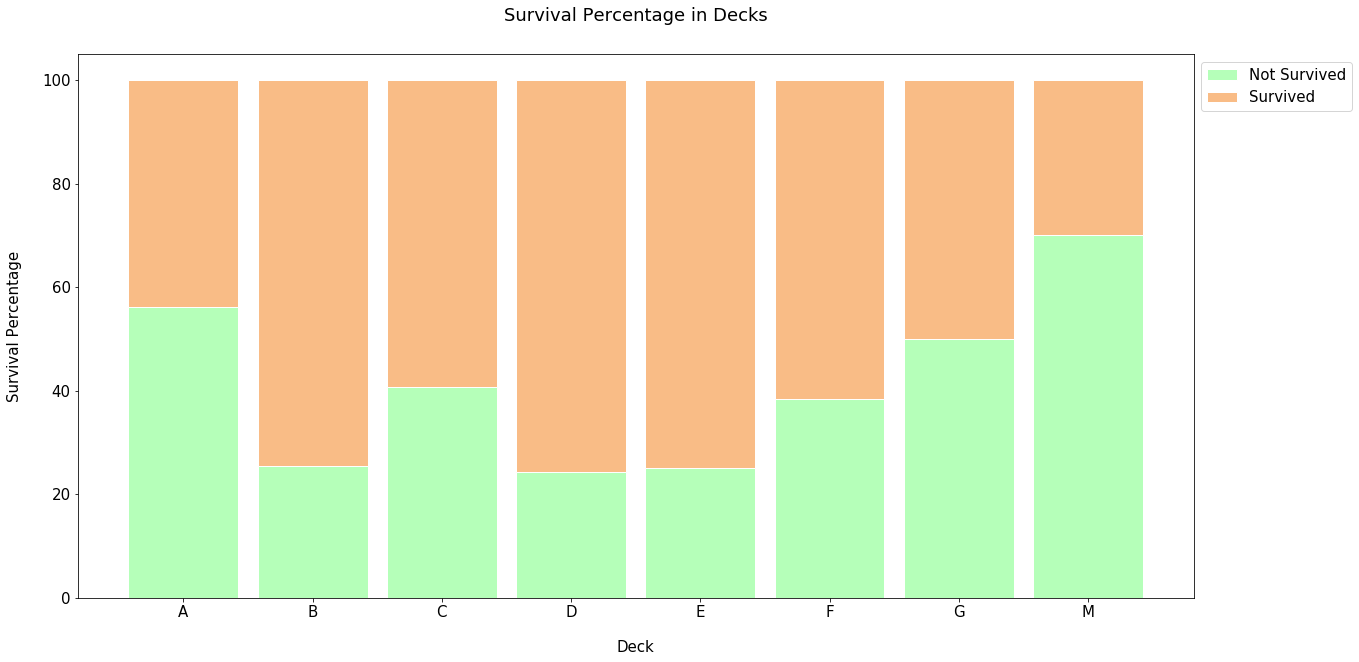

In [6]:
# Croisement avec la cible 
df_all_decks_survived = train \
                            .groupby(['Deck', 'Survived']) \
                            .count() \
                            .drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare',  'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']) \
                            .rename(columns={'Name':'Count'}) \
                            .transpose()
all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

On constate ici que les ponts ont des taux de survie différents, c'est pourquoi cette variable ne doit pas être supprimée.

Les ponts B,C,D et E ont les taux de survie les plus élevés. Ce sont les ponts occupés par des passagers de la première classe.

M (missing values) a le taux de survie le plus faible. Il est principalement occupé par des passagers de 2eme et troisième classes.

Nous pouvons penser que M (missing cabin values) a un taux de survie le plus élevé car il était difficile de retrouver les informations de cabin pour ces victimes. Afin de ne pas avoir des disparités trop importantes entre les catégories de la varible cabin nous préconisons de regrouper intelligemment les catégories.

Nous labelisons les ponts A, B et C par ABC car elles correpondent toutes aux passagers de la classe 1.
Les ponts D et E sont labélisés DE car les deux catégories ont des passagers similaires en terme de classes et de taux de survie. Nous labélisons les ponts F et G par FG pour les mêmes raisons.
Le pont M (missing values) est très différent des autres, c'est pourquoi j'ai choisi de ne pas regrouper cette information.

In [7]:
train['Deck'] = train['Deck'].replace(['A', 'B', 'C'], 'ABC')
train['Deck'] = train['Deck'].replace(['D', 'E'], 'DE')
train['Deck'] = train['Deck'].replace(['F', 'G'], 'FG')
train['Deck'].value_counts()

M      687
ABC    122
DE      65
FG      17
Name: Deck, dtype: int64

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,ABC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,ABC
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,M


    >>> TO DO: tester l'ajout de la variable Deck dans le modèle et comparer les performances avec la variable et sans la variable